In [44]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator, FuncFormatter

In [45]:
raw_data = pd.read_csv(r'G:\My Drive\Coding\Data Analytics\Finance_youtube_data_updated.csv')

In [46]:
display(raw_data)

,Channel_Name,Title,Views,Like_Count,Comment_Count,Date,Time
0,Erick Sekiama | Duplamente Rico,Ele Descobriu a Fórmula para Ficar Milionário ...,11472593,1027442,2282,2022-11-05,21:00:24
1,Primo Pobre,Como Quitar um Financiamento de 30 anos em 3 A...,10149302,984242,51229,2020-11-24,22:00:00
2,Bruno Perini - Você MAIS Rico,CASO GRAVE SOLUCIONADO ATRAVÉS DE KIT DE COLET...,9599982,684806,4054,2022-08-10,12:00:02
3,PrimoCast,JÁ TINHA PENSANDO NISSO? 🤔 INSCREVA-SE NO CANAL,8062444,581583,3806,2023-01-10,21:21:54
4,Erick Sekiama | Duplamente Rico,Elon Musk Chorou ao Responder Essa Pergunta #s...,6830144,570868,2878,2023-06-12,14:00:22
...,...,...,...,...,...,...,...
216533,El Economista TV,Localizan a 16 personas secuestradas en NL,293,0,0,2024-04-02,18:34:07
216534,Pobre Show,"Segunda 22/01, às 20h! #pobreshow #primopobre",1874,0,2,2024-01-19,17:19:47
216535,Pobre Show,Hit do Pobre Show! Gostou? #pobreshow #primopobre,1963,0,7,2024-01-20,16:16:15
216536,Pobre Show,FICA A DICA! #pobreshow #primopobre,801,0,3,2024-01-22,15:47:42


Data Adjustments and Cleaning

In [47]:
#duplicate the raw data to star work with it
finance_raw_data = raw_data

#convert column date in date type
finance_raw_data['Date'] = pd.to_datetime(finance_raw_data['Date'])
#create column year
finance_raw_data['Year'] = finance_raw_data['Date'].dt.year
#create column month
finance_raw_data['Month'] = finance_raw_data['Date'].dt.month



Cleanning

In [48]:
finance_filtered_data = finance_raw_data[
    (finance_raw_data['Year'] >= 2015) &  # Include years from 2015 onward
    (finance_raw_data['Year'] != 2025)   # Exclude 2025
]

display(finance_raw_data)

,Channel_Name,Title,Views,Like_Count,Comment_Count,Date,Time,Year,Month
0,Erick Sekiama | Duplamente Rico,Ele Descobriu a Fórmula para Ficar Milionário ...,11472593,1027442,2282,2022-11-05,21:00:24,2022,11
1,Primo Pobre,Como Quitar um Financiamento de 30 anos em 3 A...,10149302,984242,51229,2020-11-24,22:00:00,2020,11
2,Bruno Perini - Você MAIS Rico,CASO GRAVE SOLUCIONADO ATRAVÉS DE KIT DE COLET...,9599982,684806,4054,2022-08-10,12:00:02,2022,8
3,PrimoCast,JÁ TINHA PENSANDO NISSO? 🤔 INSCREVA-SE NO CANAL,8062444,581583,3806,2023-01-10,21:21:54,2023,1
4,Erick Sekiama | Duplamente Rico,Elon Musk Chorou ao Responder Essa Pergunta #s...,6830144,570868,2878,2023-06-12,14:00:22,2023,6
...,...,...,...,...,...,...,...,...,...
216533,El Economista TV,Localizan a 16 personas secuestradas en NL,293,0,0,2024-04-02,18:34:07,2024,4
216534,Pobre Show,"Segunda 22/01, às 20h! #pobreshow #primopobre",1874,0,2,2024-01-19,17:19:47,2024,1
216535,Pobre Show,Hit do Pobre Show! Gostou? #pobreshow #primopobre,1963,0,7,2024-01-20,16:16:15,2024,1
216536,Pobre Show,FICA A DICA! #pobreshow #primopobre,801,0,3,2024-01-22,15:47:42,2024,1


In [49]:
finance_raw_data.sort_values(by='Views', ascending=False)

# List of channels to remove
channels_to_remove = ["XP GAMER","La maison de poupées", "SUNO NEWS HD", "El Tarot de Poupe","B T G","Blue Television Games",
                      "Suno Pakistan","Ministerio de Economía","Margalho xp","El Economista TV","Netflix Brasil","Xadrez Brasil","Dekho Suno Jano",
                      "Economia y Desarrollo","Rico Game","Blondynki Też Grają","BTG","RICO","Learn to Invest - Investors Grow","BTG Channel","XPツ","XP!A【クロスピア】",
                      ]

# Filter out rows where Channel_Name is in the list
finance_filtered_data = finance_filtered_data[~finance_raw_data["Channel_Name"].isin(channels_to_remove)]

C:\Users\marce\AppData\Local\Temp\ipykernel_12588\1439908458.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  finance_filtered_data = finance_filtered_data[~finance_raw_data["Channel_Name"].isin(channels_to_remove)]


Data fast checks

In [50]:
finance_filtered_data.columns

Index(['Channel_Name', 'Title', 'Views', 'Like_Count', 'Comment_Count', 'Date',
       'Time', 'Year', 'Month'],
      dtype='object')

In [51]:
# Specify the channel name
channel_name = "Me Poupe!"

# Filter the DataFrame for the specified channel
channel_data = finance_raw_data[finance_raw_data["Channel_Name"] == channel_name]

# Calculate the total views
total_views = channel_data["Views"].sum()

# Display the result
print(f"Total views for {channel_name}: {total_views:,}")


Total views for Me Poupe!: 571,114,914


In [52]:

top_10_most_commented_videos = finance_filtered_data.sort_values(by='Comment_Count', ascending=False).head(10)

display(top_10_most_commented_videos)

,Channel_Name,Title,Views,Like_Count,Comment_Count,Date,Time,Year,Month
1,Primo Pobre,Como Quitar um Financiamento de 30 anos em 3 A...,10149302,984242,51229,2020-11-24,22:00:00,2020,11
1420,O Primo Rico,RUMO AO BILHÃO #20 | GANHEI 36 MIL SÓ EM PROVE...,300979,34989,43177,2020-10-01,23:00:03,2020,10
93,O Primo Rico,"QUEM TEM MAIS DINHEIRO, LULA OU BOLSONARO? | O...",3128010,208163,31330,2022-08-16,21:00:31,2022,8
2295,EconoMirna,Cartão Digio - cartão de crédito SEM ANUIDADE ...,628861,23336,25917,2016-11-12,18:49:35,2016,11
6168,O Primo Rico,DESAFIO 777 | EPI 7. COMO DESCOBRIR OPORTUNIDA...,76991,10118,22928,2020-10-21,23:00:06,2020,10
84,Me Poupe!,CASA PRÓPRIA NÃO É INVESTIMENTO! A mentira qu...,2373750,213866,18607,2019-04-04,15:00:34,2019,4
88,O Primo Rico,LULA vs BOLSONARO | COMPARANDO A ECONOMIA DOS ...,3014642,210198,17702,2022-09-06,21:00:34,2022,9
8,O Primo Rico,"INVESTI R$93,84 NO TESOURO SELIC! Aprenda a in...",5854443,454576,14491,2018-03-06,23:00:01,2018,3
1744,Me Poupe!,RENDA EXTRA NO KWAI: como ganhei 500 REAIS em ...,543413,29426,12593,2021-06-29,15:00:24,2021,6
56,Me Poupe!,6 SINAIS DE QUE VOCÊ VAI SER RICA. O primeiro ...,2273992,260575,12181,2019-03-07,15:02:33,2019,3


In [53]:

most_liked_video = finance_filtered_data.sort_values(by='Like_Count', ascending=False).head(10)

display(most_liked_video)

,Channel_Name,Title,Views,Like_Count,Comment_Count,Date,Time,Year,Month
0,Erick Sekiama | Duplamente Rico,Ele Descobriu a Fórmula para Ficar Milionário ...,11472593,1027442,2282,2022-11-05,21:00:24,2022,11
1,Primo Pobre,Como Quitar um Financiamento de 30 anos em 3 A...,10149302,984242,51229,2020-11-24,22:00:00,2020,11
2,Bruno Perini - Você MAIS Rico,CASO GRAVE SOLUCIONADO ATRAVÉS DE KIT DE COLET...,9599982,684806,4054,2022-08-10,12:00:02,2022,8
3,PrimoCast,JÁ TINHA PENSANDO NISSO? 🤔 INSCREVA-SE NO CANAL,8062444,581583,3806,2023-01-10,21:21:54,2023,1
4,Erick Sekiama | Duplamente Rico,Elon Musk Chorou ao Responder Essa Pergunta #s...,6830144,570868,2878,2023-06-12,14:00:22,2023,6
5,O Primo Rico,3 INVESTIMENTOS PRA INICIANTES NA BOLSA DE VAL...,4746710,503847,5043,2020-02-04,23:00:01,2020,2
6,Primo Pobre,52 IDEIAS DE RENDA-EXTRA PARA VOCÊ SAIR DA POB...,5407481,478385,10739,2023-05-04,21:00:09,2023,5
7,O Primo Rico,"INVESTI R$ 150,84 EM FUNDO IMOBILIARIO (FII) N...",3871056,455845,5895,2019-02-27,22:00:01,2019,2
8,O Primo Rico,"INVESTI R$93,84 NO TESOURO SELIC! Aprenda a in...",5854443,454576,14491,2018-03-06,23:00:01,2018,3
9,Me Poupe!,COMO SOBRAR DINHEIRO: 5 super dicas que funcionam,4337890,436249,4525,2018-03-26,22:00:00,2018,3


What are the most viewed finance-related videos and channels?

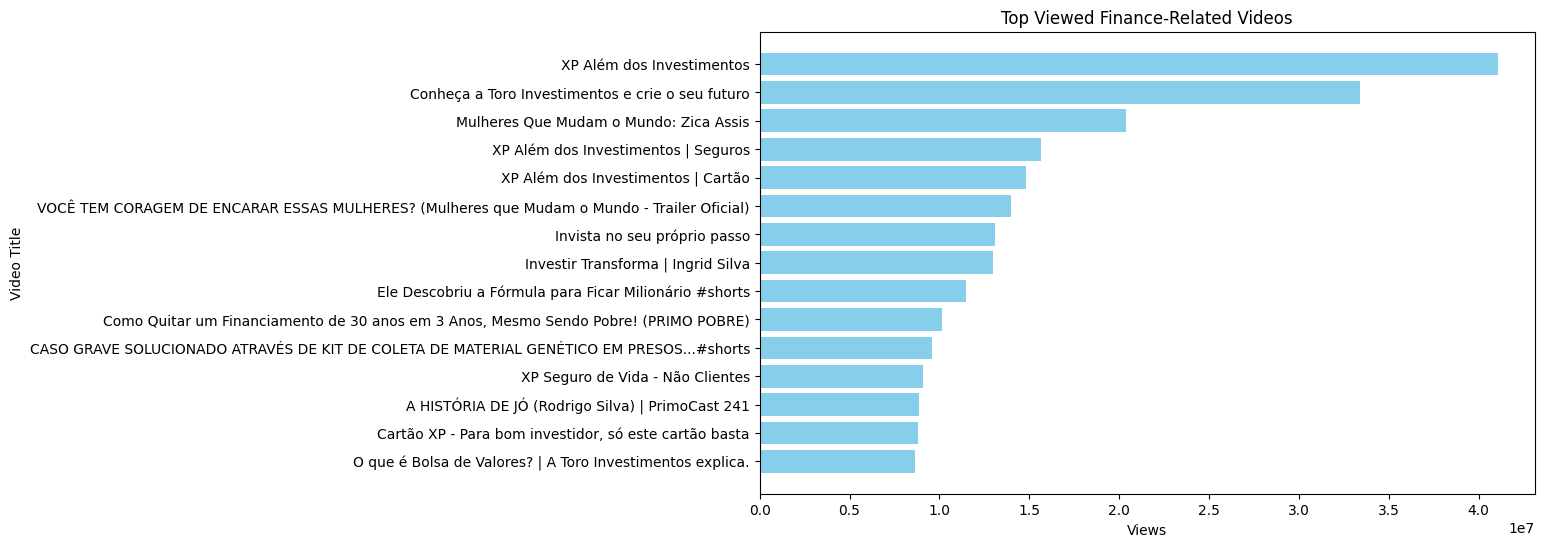

In [54]:
# Number of top videos/channels to display
top_n = 15

# Sort by views
top_videos = finance_filtered_data.nlargest(top_n, 'Views')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_videos["Title"], top_videos["Views"], color='skyblue')
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.title("Top Viewed Finance-Related Videos")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()




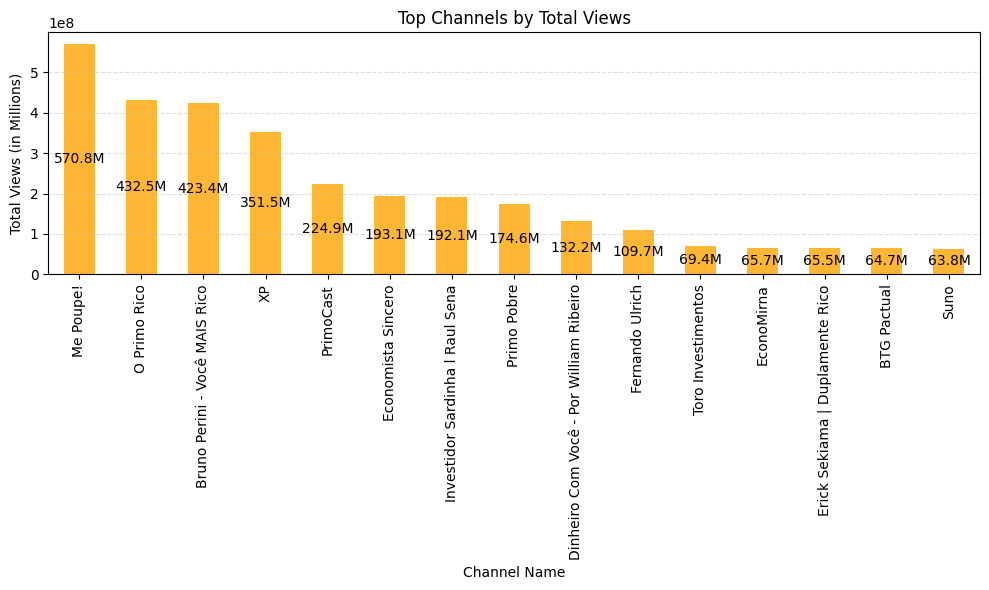

In [55]:
# Aggregate views by channel
top_channels = finance_filtered_data.groupby("Channel_Name")["Views"].sum().nlargest(top_n)

# Plotting
plt.figure(figsize=(10, 6))
ax = top_channels.plot(kind='bar', color='orange', alpha=0.8)

# Add the total number of views inside the bars in millions
for index, value in enumerate(top_channels):
    plt.text(index, value / 2, f"{value / 1_000_000:.1f}M", ha='center', va='center', fontsize=10, color='Black')

plt.xlabel("Channel Name")
plt.ylabel("Total Views (in Millions)")
plt.title("Top Channels by Total Views")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\marce\AppData\Local\Temp\ipykernel_12588\919887625.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=videos_by_channel.head(25), x='Video_Count', y='Channel_Name', palette='viridis')


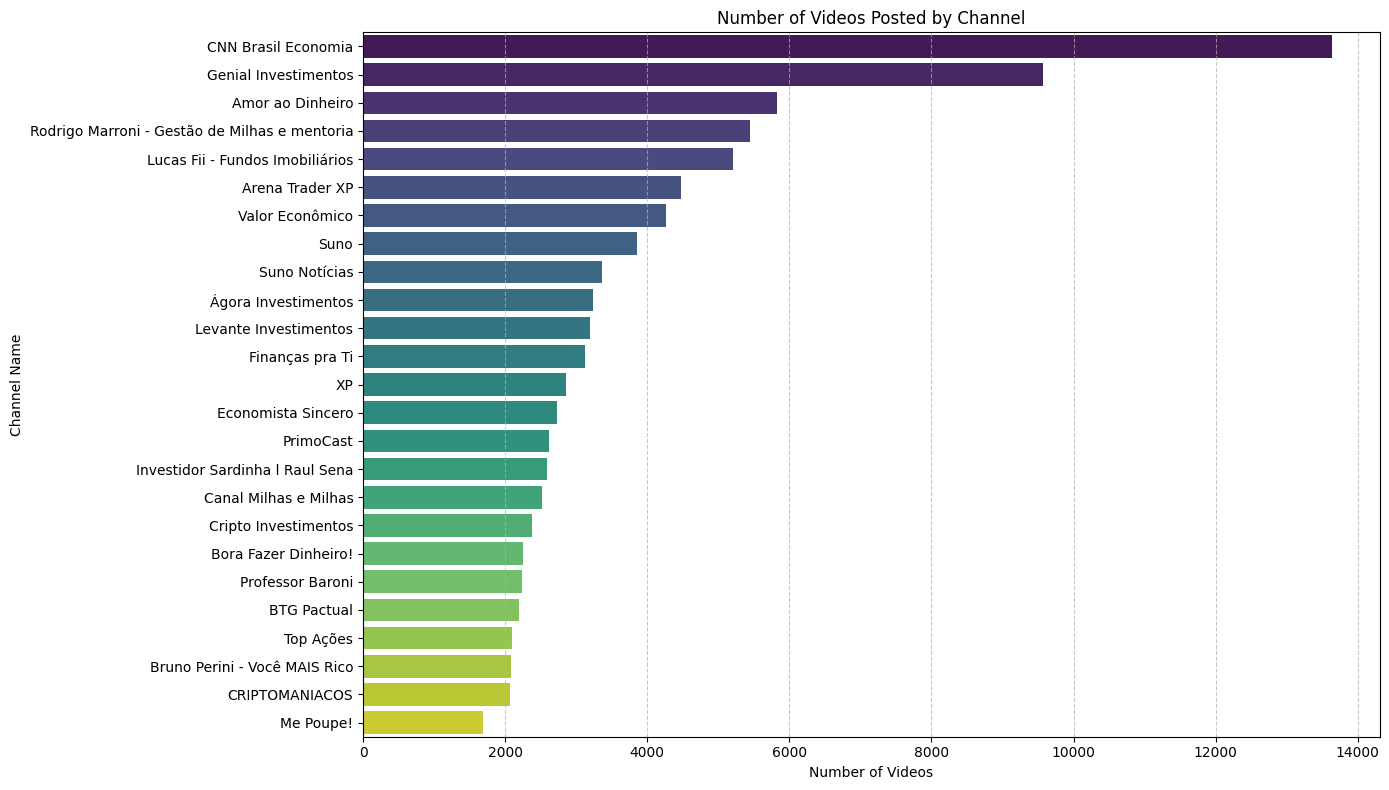

In [56]:
# Group by Channel_Name to count the number of videos posted
videos_by_channel = finance_filtered_data.groupby('Channel_Name').size().reset_index(name='Video_Count')

# Sort the data by Video_Count in descending order
videos_by_channel = videos_by_channel.sort_values(by='Video_Count', ascending=False)

# Plot the number of videos posted by channel
plt.figure(figsize=(14, 8))
sns.barplot(data=videos_by_channel.head(25), x='Video_Count', y='Channel_Name', palette='viridis')
plt.title('Number of Videos Posted by Channel')
plt.xlabel('Number of Videos')
plt.ylabel('Channel Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

What types of finance topics (e.g., investing, budgeting, taxes) generate the most engagement?

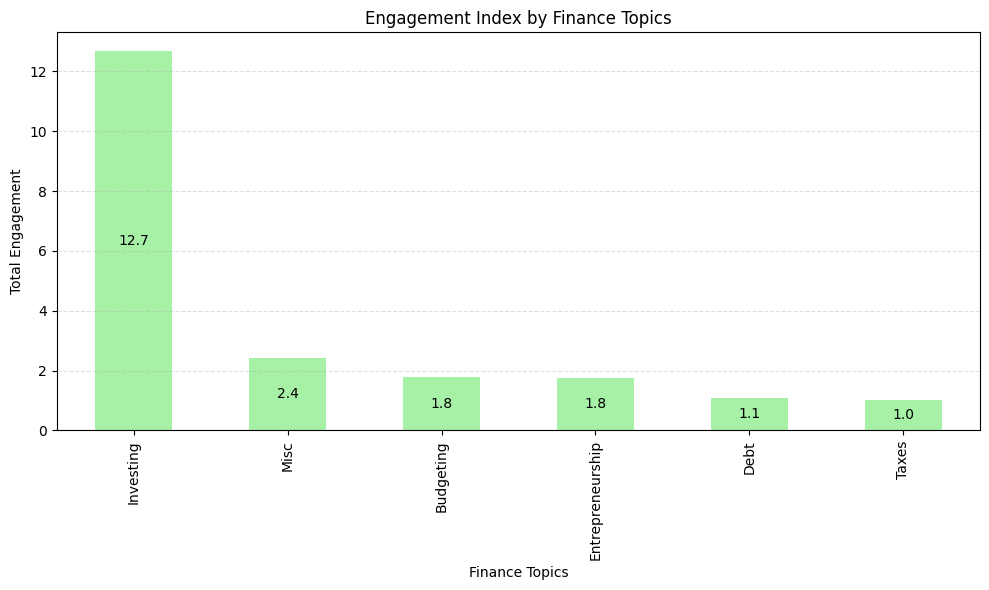

In [57]:
# Define topics and keywords
topics_keywords = {
    "Investing": ["investir", 
                  "ações", 
                  "portfolio", 
                  "FII",
                  "CDB",
                  "Tesouro",
                  "Fundos Imobiliários",
                  "Imóvel",
                  "bitcoin",
                  "cripto",
                  "criptomoedas",
                  "selic",
                  "cdi",
                  "opções",
                  "etd",
                  "dolar",
                  "S&P",
                  "juros"],
    "Budgeting": [ "financiamento", 
                  "economizar", 
                  "guardar",
                  "patrimonio",
                  "organizar",
                  "salário",
                  "metas",
                  "sonho",
                  "objetivos",
                  "poupança",
                  "orçamento",
                  "economize"],
    "Taxes": ["taxas", 
              "imposto de renda", 
              "IRPF", 
              "imposto",
              "estado",
              "governo",
              "leao",
              "tributos",
              "tributario"],
    "Debt": ["dívida", 
             "divida", 
             "serasa", 
             "devendo",
             "pagar",
             "atrasei",
             "atraso",
             "endividar"],
    "Entrepreneurship":["negocio",
                        "mei",
                        "renda extra",
                        "empreender",
                        "empresário",
                        "empreendedor",
                        "empresa"],
    "Misc":["milhas",
            "cartão de crédito",
            "viagem",
            "livelo",
            "avião",
            "vip",
            "nft",
            "política",
            "lula",
            "trump",
            "bolsonaro",
            "crise",
            "quebrar"
            ]

}

# Create a new column for the topic
def categorize_topic(title):
    for topic, keywords in topics_keywords.items():
        if any(keyword.lower() in title.lower() for keyword in keywords):
            return topic
    return "Other"

finance_filtered_data["Topic"] = finance_raw_data["Title"].apply(categorize_topic)

# Calculate engagement
finance_filtered_data["Engagement"] = (
    (finance_filtered_data["Views"]) + 
    (finance_filtered_data["Like_Count"]*4) + #like count has double of weight of views
    (finance_filtered_data["Comment_Count"]*8) #comment count has 8x more weight than views
)/100000000

# Aggregate engagement by topic
engagement_by_topic = finance_filtered_data.groupby("Topic")["Engagement"].sum()

# Remove the "Other" topic
engagement_by_topic = engagement_by_topic[engagement_by_topic.index != "Other"]

# Plotting
plt.figure(figsize=(10, 6))
ax = engagement_by_topic.sort_values(ascending=False).plot(kind="bar", color="lightgreen", alpha=0.8)

# Add total engagement numbers in the middle of each bar
for index, value in enumerate(engagement_by_topic.sort_values(ascending=False)):
    plt.text(index, value / 2, f"{value :.1f}", ha='center', va='center', fontsize=10, color="black")

# Format Y-axis scale to 10^8
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x :.0f}'))

plt.xlabel("Finance Topics")
plt.ylabel("Total Engagement")
plt.title("Engagement Index by Finance Topics")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


In [58]:
# Find the video with the highest engagement for each topic
top_videos_by_topic = (
    finance_filtered_data.loc[finance_filtered_data.groupby("Topic")["Engagement"].idxmax()]
)

top_videos_by_topic

,Channel_Name,Title,Views,Like_Count,Comment_Count,Date,Time,Year,Month,Topic,Engagement
1,Primo Pobre,Como Quitar um Financiamento de 30 anos em 3 A...,10149302,984242,51229,2020-11-24,22:00:00,2020,11,Budgeting,0.144961
153,Dinheiro Com Você - Por William Ribeiro,DIVIDA CADUCA APÓS 5 ANOS?,5012806,169519,1859,2023-05-09,19:54:11,2023,5,Debt,0.057058
57,Economista Sincero,PRESSÃO NA COCA-COLA: Como é TRABALHAR na MAIO...,6138994,259537,4331,2023-07-27,23:00:12,2023,7,Entrepreneurship,0.072118
105615,XP,Investir Transforma | Ingrid Silva,13009407,114,20,2021-04-22,20:06:53,2021,4,Investing,0.130100
36,Me Poupe!,7 NOVOS APLICATIVOS PRA GANHAR DINHEIRO PELO C...,4113414,305825,4126,2021-11-11,15:00:04,2021,11,Misc,0.053697
106939,XP,XP Além dos Investimentos,41070466,111,4,2024-05-15,14:16:26,2024,5,Other,0.410709
88,O Primo Rico,LULA vs BOLSONARO | COMPARANDO A ECONOMIA DOS ...,3014642,210198,17702,2022-09-06,21:00:34,2022,9,Taxes,0.039970


In [59]:
# Aggregate engagement by channel
engagement_by_channel = finance_filtered_data.groupby("Channel_Name")["Engagement"].sum().sort_values(ascending=False)

# Display the top channels by engagement
top_channels_by_engagement = engagement_by_channel.head(15)
print(top_channels_by_engagement)

Channel_Name
Me Poupe!                                  7.754115
O Primo Rico                               5.864249
Bruno Perini - Você MAIS Rico              5.607327
XP                                         3.552793
Economista Sincero                         2.821557
PrimoCast                                  2.733596
Investidor Sardinha l Raul Sena            2.678853
Primo Pobre                                2.516773
Dinheiro Com Você - Por William Ribeiro    1.764742
Fernando Ulrich                            1.576158
Erick Sekiama | Duplamente Rico            0.877607
EconoMirna                                 0.847033
Suno                                       0.817697
CRIPTOMANIACOS                             0.733015
Toro Investimentos                         0.727429
Name: Engagement, dtype: float64


How has the popularity of finance-related content changed over time?

C:\Users\marce\AppData\Local\Temp\ipykernel_12588\3425662830.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=videos_by_year, x='Year', y='Video_Count', palette='viridis')


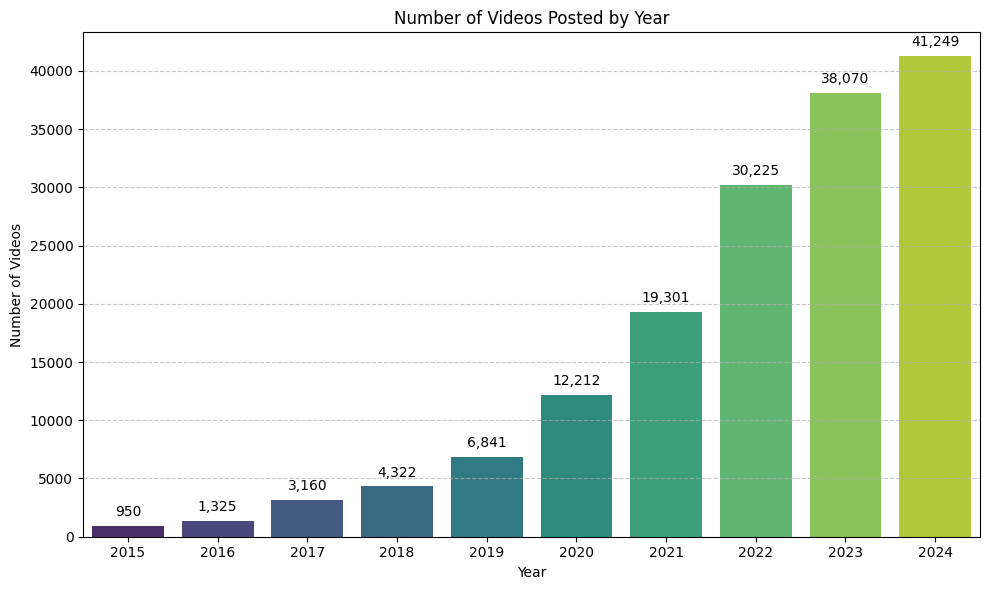

In [60]:
# Group by Year to count the number of videos posted
videos_by_year = finance_filtered_data.groupby('Year').size().reset_index(name='Video_Count')
videos_by_year = videos_by_year[videos_by_year['Year'] != 2025]

# Plot the number of videos posted by year
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=videos_by_year, x='Year', y='Video_Count', palette='viridis')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of Videos Posted by Year')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\marce\AppData\Local\Temp\ipykernel_12588\4193357844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=videos_by_month_year, x='Month', y='Video_Count', palette='viridis')
C:\Users\marce\AppData\Local\Temp\ipykernel_12588\4193357844.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')


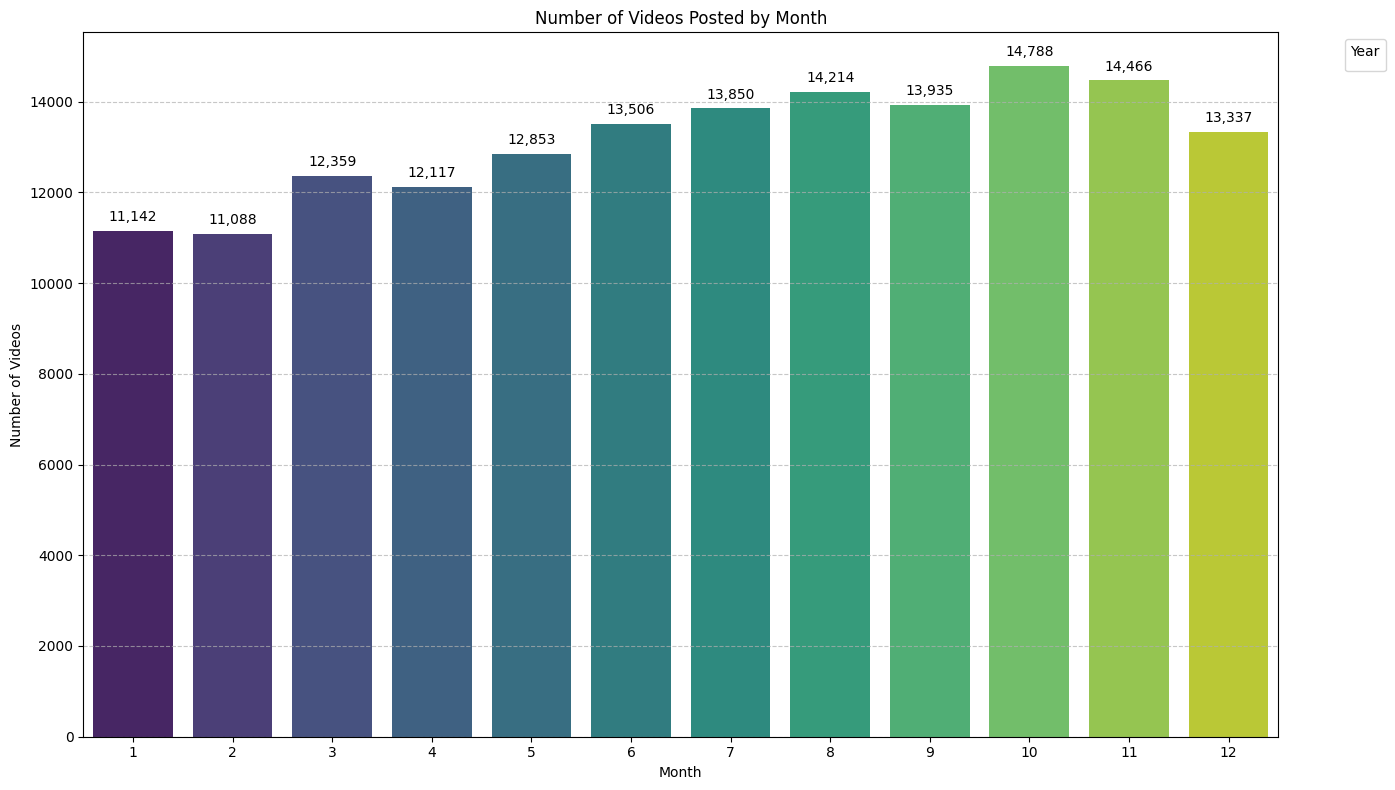

In [61]:
# Group by Year and Month to count the number of videos posted
videos_by_month_year = finance_filtered_data.groupby(['Month']).size().reset_index(name='Video_Count')

# Plot the number of videos posted by month
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=videos_by_month_year, x='Month', y='Video_Count', palette='viridis')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of Videos Posted by Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\marce\AppData\Local\Temp\ipykernel_12588\171935796.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=total_views_by_month, x='Month', y='Views', palette='viridis')


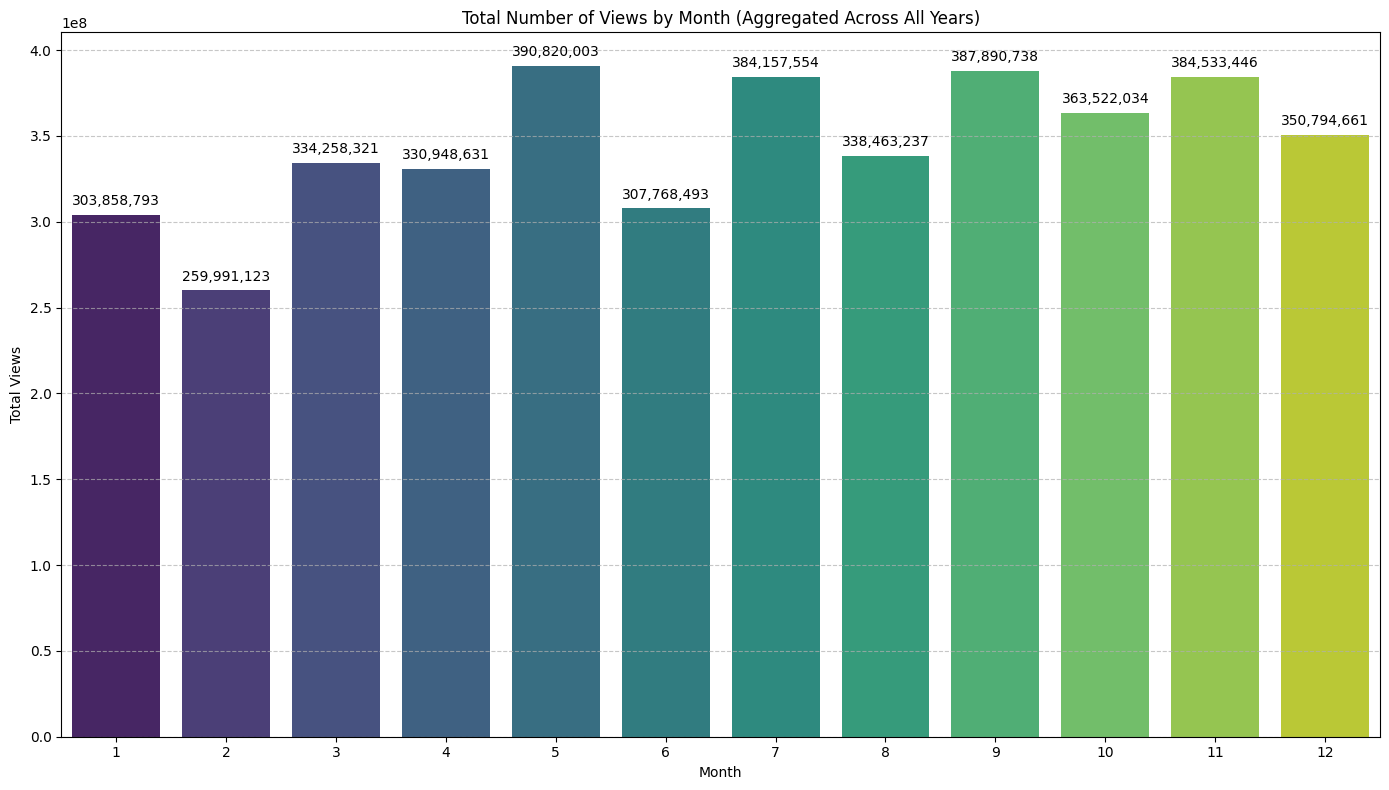

In [62]:
# Group by Year and Month to calculate the total number of views
views_by_month = finance_filtered_data.groupby(['Year', 'Month'])['Views'].sum().reset_index()

# Group by Month to calculate the total number of views across all years
total_views_by_month = finance_filtered_data.groupby('Month')['Views'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=total_views_by_month, x='Month', y='Views', palette='viridis')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Month')
plt.ylabel('Total Views')
plt.title('Total Number of Views by Month (Aggregated Across All Years)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\marce\AppData\Local\Temp\ipykernel_12588\2557255913.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=videos_by_month_me_poupe, x='Month', y='Video_Count', palette='viridis')


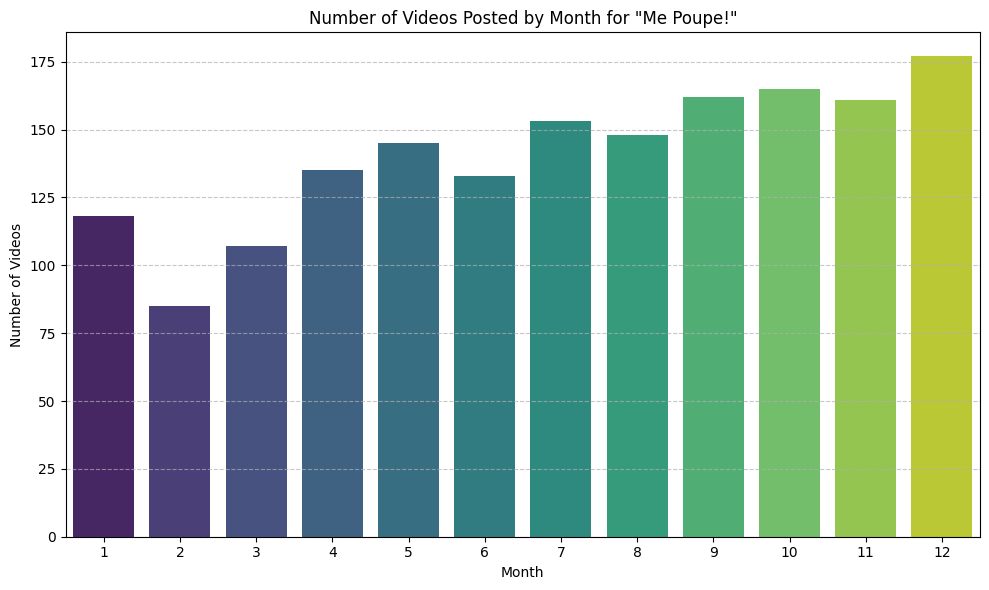

In [63]:
# Filter the data for the channel "Me Poupe!"
me_poupe_data = finance_filtered_data[finance_filtered_data["Channel_Name"] == "Me Poupe!"]

# Group by Month to count the number of videos posted
videos_by_month_me_poupe = me_poupe_data.groupby('Month').size().reset_index(name='Video_Count')

# Plot the number of videos posted by month
plt.figure(figsize=(10, 6))
sns.barplot(data=videos_by_month_me_poupe, x='Month', y='Video_Count', palette='viridis')
plt.title('Number of Videos Posted by Month for "Me Poupe!"')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\marce\AppData\Local\Temp\ipykernel_12588\2442453531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=videos_by_month_primo_rico, x='Month', y='Video_Count', palette='viridis')


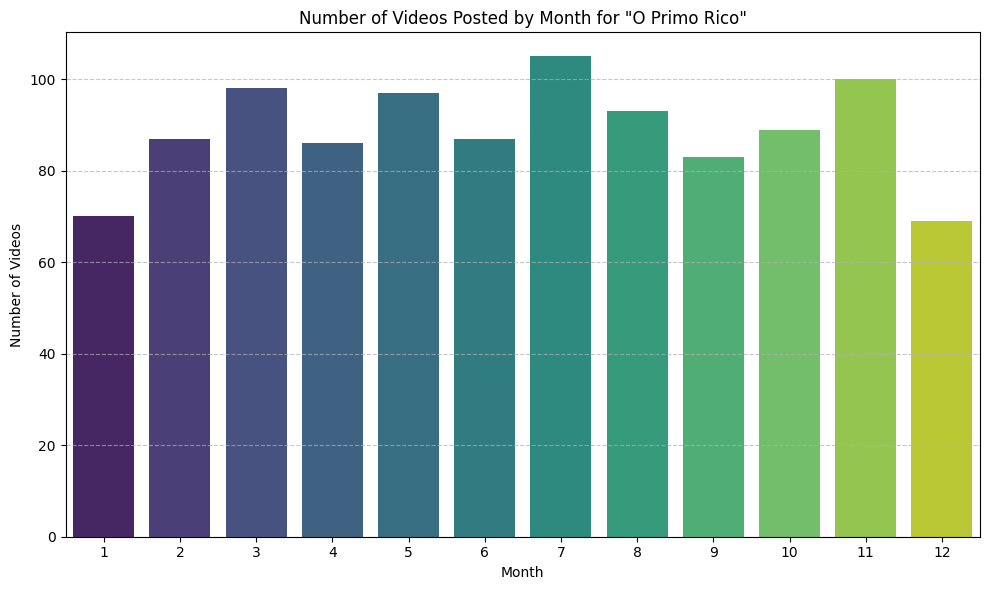

In [64]:
# Filter the data for the channel "Me Poupe!"
primo_rico = finance_filtered_data[finance_filtered_data["Channel_Name"] == "O Primo Rico"]

# Group by Month to count the number of videos posted
videos_by_month_primo_rico = primo_rico.groupby('Month').size().reset_index(name='Video_Count')

# Plot the number of videos posted by month
plt.figure(figsize=(10, 6))
sns.barplot(data=videos_by_month_primo_rico, x='Month', y='Video_Count', palette='viridis')
plt.title('Number of Videos Posted by Month for "O Primo Rico"')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [65]:
finance_filtered_data_by_year = finance_filtered_data.groupby('Year').size().reset_index(name='Video_Count')
me_poupe_data = me_poupe_data.groupby('Year').size().reset_index(name='Video_Count')
primo_rico = primo_rico.groupby('Year').size().reset_index(name='Video_Count')

# Merge the dataframes on 'Year'
merged_data = finance_filtered_data_by_year.merge(me_poupe_data, on='Year', suffixes=('', '_me_poupe'))
merged_data = merged_data.merge(primo_rico, on='Year', suffixes=('', '_primo_rico'))

# Calculate the index for me_poupe_data and primo_rico
merged_data['Index_me_poupe'] = merged_data['Video_Count_me_poupe'] / merged_data['Video_Count']*100
merged_data['Index_primo_rico'] = merged_data['Video_Count_primo_rico'] / merged_data['Video_Count']*100

display(merged_data)

,Year,Video_Count,Video_Count_me_poupe,Video_Count_primo_rico,Index_me_poupe,Index_primo_rico
0,2016,1325,113,82,8.528302,6.188679
1,2017,3160,140,100,4.430380,3.164557
2,2018,4322,129,109,2.984729,2.521981
3,2019,6841,222,89,3.245140,1.300979
4,2020,12212,151,109,1.236489,0.892565
5,2021,19301,141,110,0.730532,0.569919
6,2022,30225,137,93,0.453267,0.307692
7,2023,38070,310,104,0.814289,0.273181
8,2024,41249,322,268,0.780625,0.649713


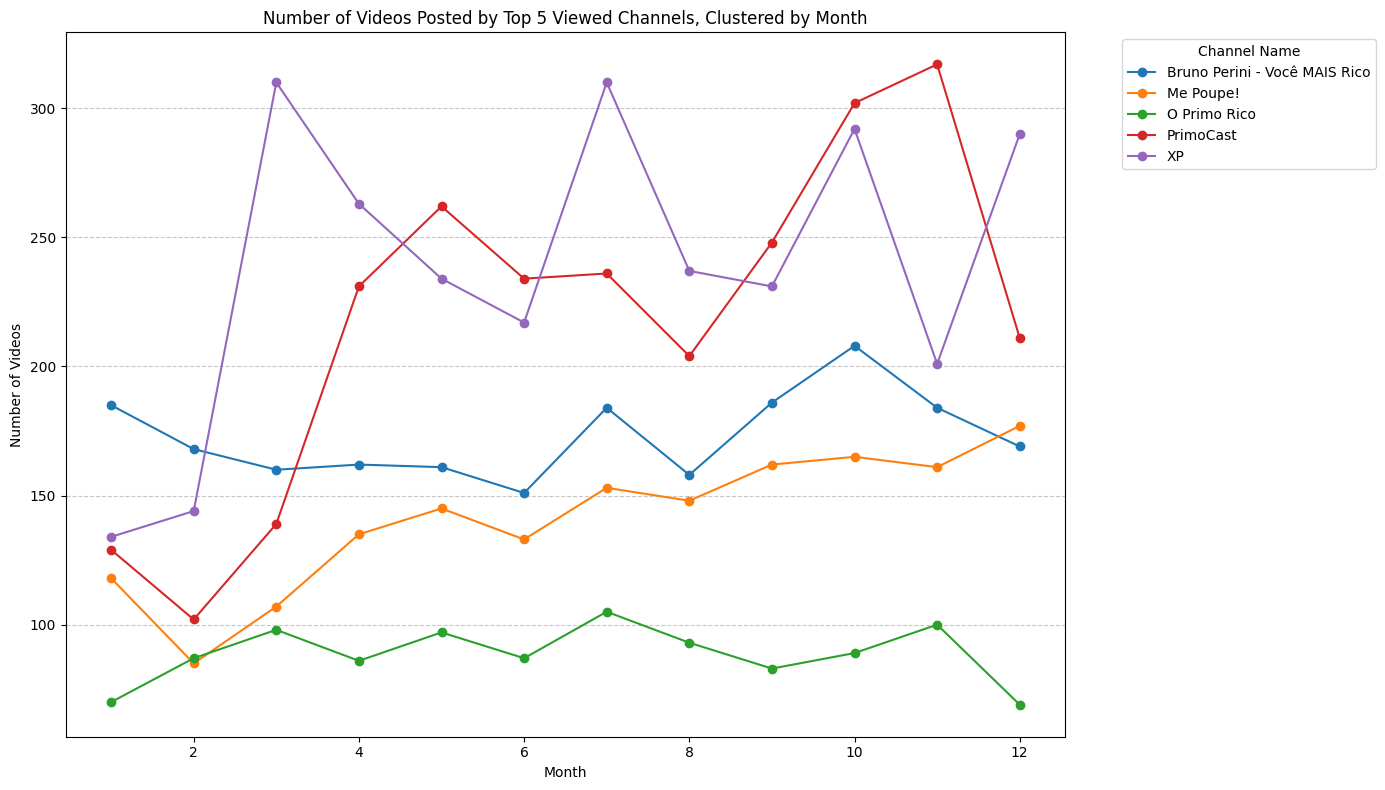

In [66]:
# Get the top 5 viewed channels
top_5_channels = top_channels[:5].index

# Filter the data for the top 5 channels
top_5_channels_data = finance_filtered_data[finance_filtered_data["Channel_Name"].isin(top_5_channels)]

# Group by Channel_Name and Month to count the number of videos posted
videos_by_month_channel = top_5_channels_data.groupby(['Channel_Name', 'Month']).size().reset_index(name='Video_Count')

# Pivot the data to have months as rows and channels as columns
videos_by_month_channel_pivot = videos_by_month_channel.pivot(index='Month', columns='Channel_Name', values='Video_Count').fillna(0)

# Plotting
videos_by_month_channel_pivot.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Number of Videos Posted by Top 5 Viewed Channels, Clustered by Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

What seasonal trends can be observed in finance-related video views and engagement?

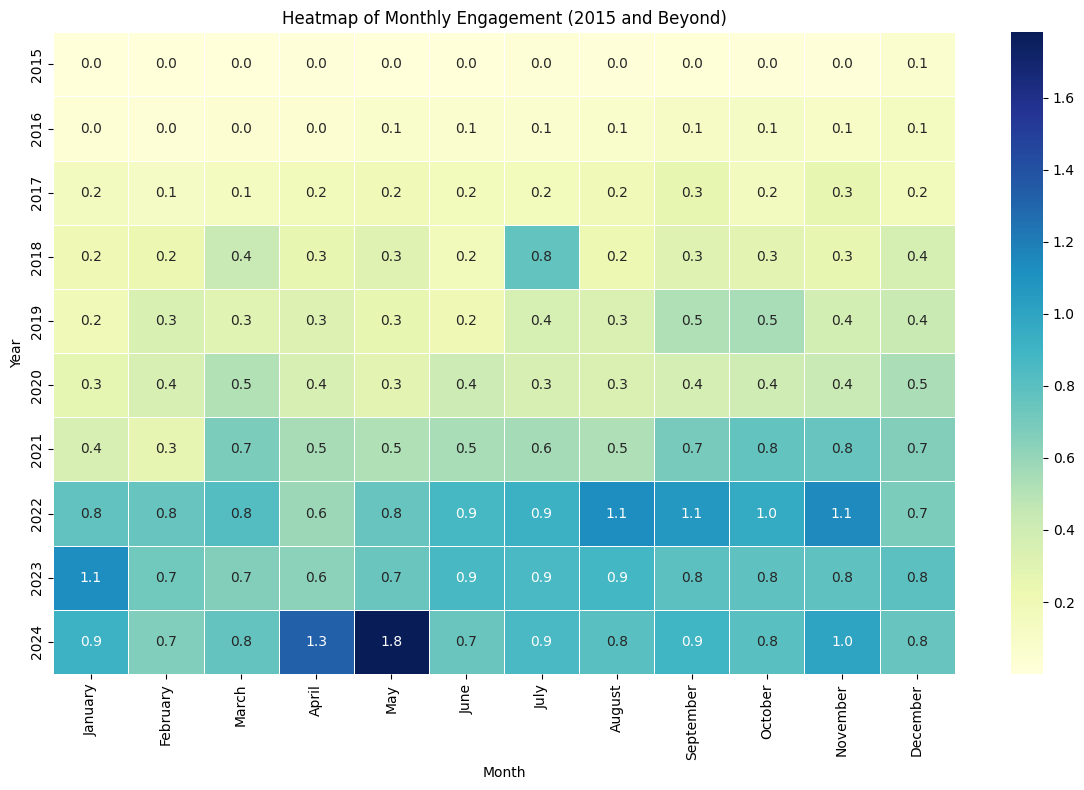

In [67]:
import locale
import calendar

# Set locale to English for month names
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

# Filter the data for years 2015 and beyond
filtered_data = finance_filtered_data[finance_filtered_data["Date"].dt.year >= 2015]

# Create the pivot table with numeric months for sorting
heatmap_data = filtered_data.pivot_table(
    index=filtered_data["Date"].dt.year,
    columns=filtered_data["Date"].dt.month,  # Use month numbers
    values="Engagement",
    aggfunc="sum"
)

# Rename columns with English month names
heatmap_data.columns = [calendar.month_name[month] for month in heatmap_data.columns]

# Ensure columns (months) are in proper order
heatmap_data = heatmap_data.reindex(columns=calendar.month_name[1:])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap of Monthly Engagement (2015 and Beyond)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()


In [68]:
# Filter the data for April and May of 2024
april_may_2024_videos = finance_filtered_data[
    (finance_filtered_data['Year'] == 2024) & 
    (finance_filtered_data['Month'].isin([4, 5]))
]

# Sort the videos by views in descending order
most_viewed_videos_april_may_2024 = april_may_2024_videos.sort_values(by='Views', ascending=False)

# Rank the videos by engagement
most_viewed_videos_april_may_2024['Engagement_Rank'] = most_viewed_videos_april_may_2024['Engagement'].rank(ascending=False)

# Display the top videos
display(most_viewed_videos_april_may_2024)

,Channel_Name,Title,Views,Like_Count,Comment_Count,Date,Time,Year,Month,Topic,Engagement,Engagement_Rank
106939,XP,XP Além dos Investimentos,41070466,111,4,2024-05-15,14:16:26,2024,5,Other,4.107094e-01,1.0
11140,XP,XP Além dos Investimentos | Seguros,15670212,5140,4,2024-05-20,21:45:43,2024,5,Other,1.569080e-01,2.0
2716,XP,XP Além dos Investimentos | Cartão,14809161,20243,7,2024-05-20,21:35:41,2024,5,Other,1.489019e-01,3.0
157740,XP,XP Seguro de Vida - Não Clientes,9117017,24,0,2024-04-24,18:42:05,2024,4,Other,9.117113e-02,4.0
157916,XP,XP Previdência - Não clientes,8606931,24,0,2024-04-24,18:16:34,2024,4,Other,8.607027e-02,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
198338,PagBank Investimentos,Análises e day trade ao vivo - 11/04/2024,29,4,0,2024-04-12,02:03:26,2024,4,Other,4.500000e-07,6567.5
209986,Monica Serra - Finanças,#shorts Como a sazonalidade impacta o ambiente...,24,1,0,2024-04-01,15:00:49,2024,4,Entrepreneurship,2.800000e-07,6577.0
200257,PagBank Investimentos,Análises e day trade ao vivo - 10/04/2024,21,3,0,2024-04-11,02:17:13,2024,4,Other,3.300000e-07,6576.0
209987,Monica Serra - Finanças,#shorts Se sua empresa estiver passando por es...,21,1,0,2024-04-03,15:00:15,2024,4,Entrepreneurship,2.500000e-07,6578.0


What video titles or keywords are associated with higher engagement?

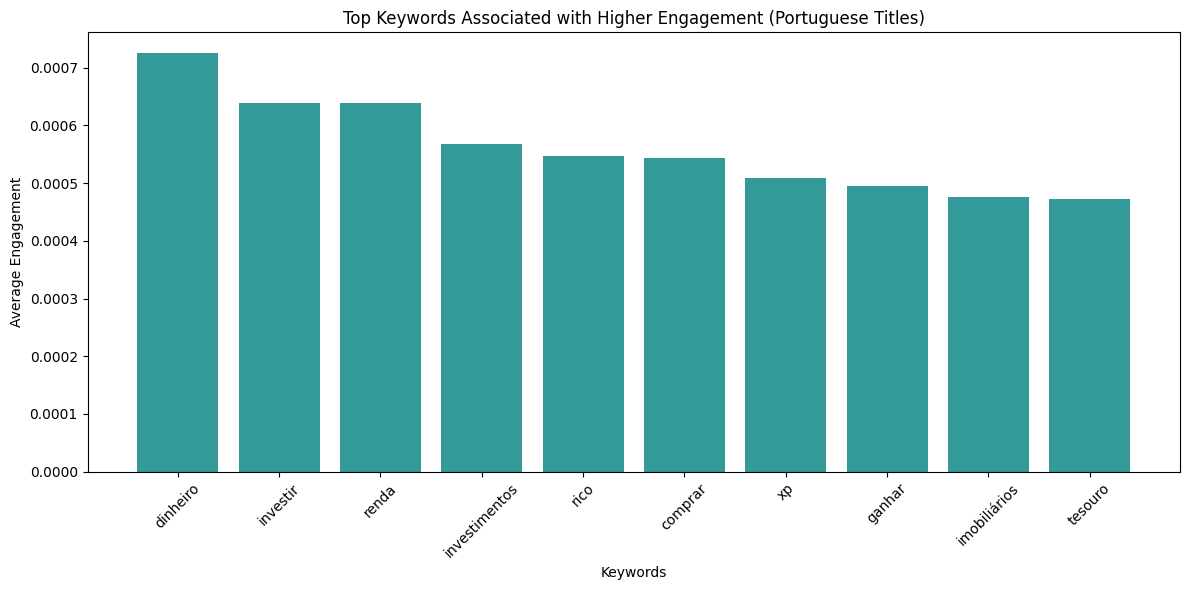

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Portuguese stop words are used
portuguese_stop_words = [
    "de", "da", "do", "em", "para", "que", "e", "o", "a", "os", "as", "um", "uma", 
    "no", "na", "com", "por", "se", "ao", "dos", "das", "mais", "meu", "minha", 
    "seu", "sua", "seus", "suas", "já", "ou", "como", "ele", "ela", "você", 
    "não", "sim", "pelo", "pela","vai","shorts","está","qual"
]

# Step 1: Extract keywords from video titles in Portuguese
vectorizer = CountVectorizer(stop_words=portuguese_stop_words, max_features=50)
title_matrix = vectorizer.fit_transform(finance_filtered_data["Title"])

# Create a DataFrame of keywords with their frequencies
keywords = vectorizer.get_feature_names_out()
keyword_counts = title_matrix.sum(axis=0).A1
keyword_df = pd.DataFrame({"Keyword": keywords, "Frequency": keyword_counts})

# Step 2: Calculate average engagement for each keyword
def calculate_keyword_engagement(keyword):
    mask = finance_filtered_data["Title"].str.contains(keyword, case=False, na=False)
    return finance_filtered_data.loc[mask, "Engagement"].mean()

keyword_df["Avg_Engagement"] = keyword_df["Keyword"].apply(calculate_keyword_engagement)

# Step 3: Filter top keywords by engagement
top_keywords = keyword_df.sort_values("Avg_Engagement", ascending=False).head(10)

# Step 4: Plot the top keywords
plt.figure(figsize=(12, 6))
plt.bar(top_keywords["Keyword"], top_keywords["Avg_Engagement"], color="teal", alpha=0.8)
plt.xlabel("Keywords")
plt.ylabel("Average Engagement")
plt.title("Top Keywords Associated with Higher Engagement (Portuguese Titles)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


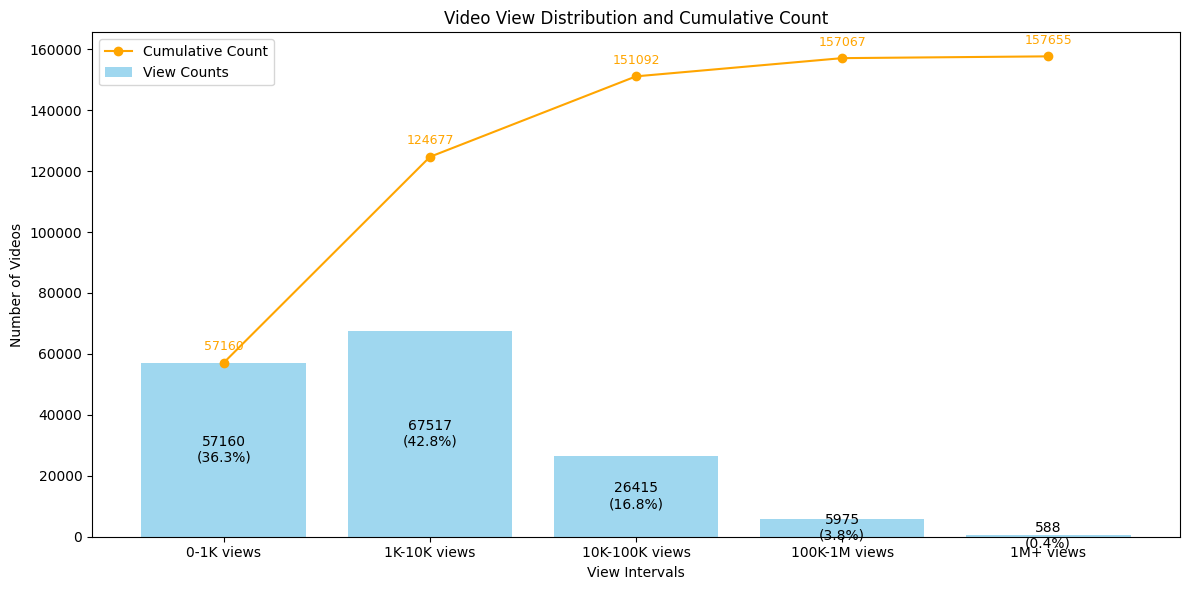

Total number of videos: 157655


In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define intervals for views
bins = [0, 1000, 10000, 100000, 1000000, np.inf]
labels = [
    "0-1K views",
    "1K-10K views",
    "10K-100K views",
    "100K-1M views",
    "1M+ views",
]

# Count the number of videos in each interval
finance_filtered_data["View_Interval"] = pd.cut(
    finance_filtered_data["Views"], bins=bins, labels=labels, right=False
)
view_counts = finance_filtered_data["View_Interval"].value_counts(sort=False)

# Calculate total number of videos
total_videos = len(finance_filtered_data)

# Calculate the percentage of videos in each interval
view_percentages = (view_counts / total_videos) * 100

# Create a cumulative count for the waterfall graph
cumulative_counts = view_counts.cumsum()

# Plot the waterfall graph
plt.figure(figsize=(12, 6))

# Bar plot for view counts
plt.bar(labels, view_counts, color="skyblue", alpha=0.8, label="View Counts")

# Line plot for cumulative counts
plt.plot(
    range(len(cumulative_counts)),
    cumulative_counts,
    marker="o",
    color="orange",
    label="Cumulative Count",
)

# Annotate the bars with the counts and percentages
for i, (count, percentage) in enumerate(zip(view_counts, view_percentages)):
    plt.text(i, count / 2, f"{count}\n({percentage:.1f}%)", ha="center", va="center", fontsize=10)

# Annotate the cumulative line with total videos
for i, count in enumerate(cumulative_counts):
    plt.text(
        i,
        count + total_videos * 0.02,
        f"{count}",
        ha="center",
        va="bottom",
        fontsize=9,
        color="orange",
    )

# Add labels, title, and legend
plt.xlabel("View Intervals")
plt.ylabel("Number of Videos")
plt.title("Video View Distribution and Cumulative Count")
plt.legend()
plt.tight_layout()
plt.show()

# Print total number of videos
print(f"Total number of videos: {total_videos}")

In [71]:
# Filter videos with more than 10K views
videos_above_10k = finance_filtered_data[finance_filtered_data["Views"] > 10000]

# Count the number of such videos per channel
channel_video_counts = videos_above_10k.groupby("Channel_Name").size().reset_index(name="Video_Count")

# Sort channels by the number of videos in descending order
sorted_channels = channel_video_counts.sort_values(by="Video_Count", ascending=False)

# Display the top channels
print("Channels with the most videos having more than 10K views:")
print(sorted_channels.head(10))


Channels with the most videos having more than 10K views:
                        Channel_Name  Video_Count
36                Economista Sincero         2552
58   Investidor Sardinha l Raul Sena         2248
13     Bruno Perini - Você MAIS Rico         1976
77                         Me Poupe!         1624
97                       Primo Pobre         1338
116                        Top Ações         1252
41                   Fernando Ulrich         1168
16                    CRIPTOMANIACOS         1110
98                         PrimoCast         1060
89                      O Primo Rico         1047


C:\Users\marce\AppData\Local\Temp\ipykernel_12588\643680953.py:59: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\marce\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


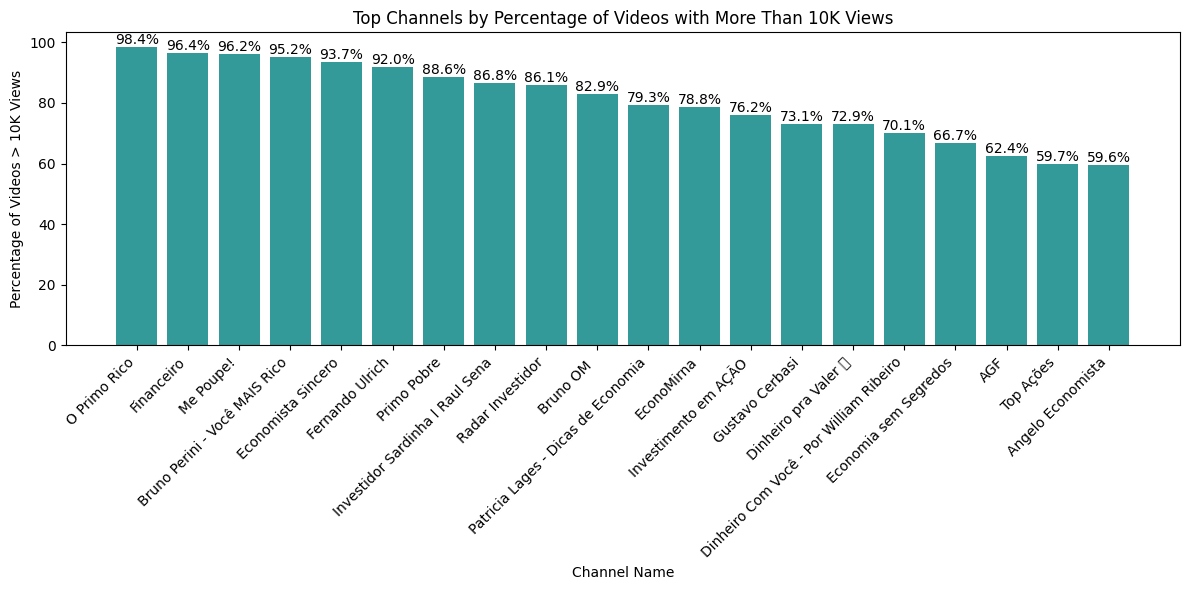

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define intervals for views
bins = [0, 1000, 10000, 100000, 1000000, np.inf]
labels = [
    "0-1K views",
    "1K-10K views",
    "10K-100K views",
    "100K-1M views",
    "1M+ views",
]

# Count the number of videos in each interval
finance_filtered_data["View_Interval"] = pd.cut(
    finance_filtered_data["Views"], bins=bins, labels=labels, right=False
)
view_counts = finance_filtered_data["View_Interval"].value_counts(sort=False)

# Calculate total number of videos per channel
channel_total_videos = finance_filtered_data["Channel_Name"].value_counts()

# Filter videos with more than 10,000 views
filtered_videos = finance_filtered_data[finance_filtered_data["Views"] > 10000]

# Count videos with more than 10K views per channel
channel_high_view_counts = filtered_videos["Channel_Name"].value_counts()

# Calculate percentage of high-view videos relative to total videos per channel
channel_high_view_percentages = (
    (channel_high_view_counts / channel_total_videos) * 100
).dropna().sort_values(ascending=False).head(20)

# Plot the graph for top channels with data labels
plt.figure(figsize=(12, 6))
bars = plt.bar(
    channel_high_view_percentages.index,
    channel_high_view_percentages.values,
    color="teal",
    alpha=0.8,
)

# Annotate bars with percentages
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
    )

plt.xlabel("Channel Name")
plt.ylabel("Percentage of Videos > 10K Views")
plt.title("Top Channels by Percentage of Videos with More Than 10K Views")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Which keywords or phrases appear most frequently in high-performing video titles?

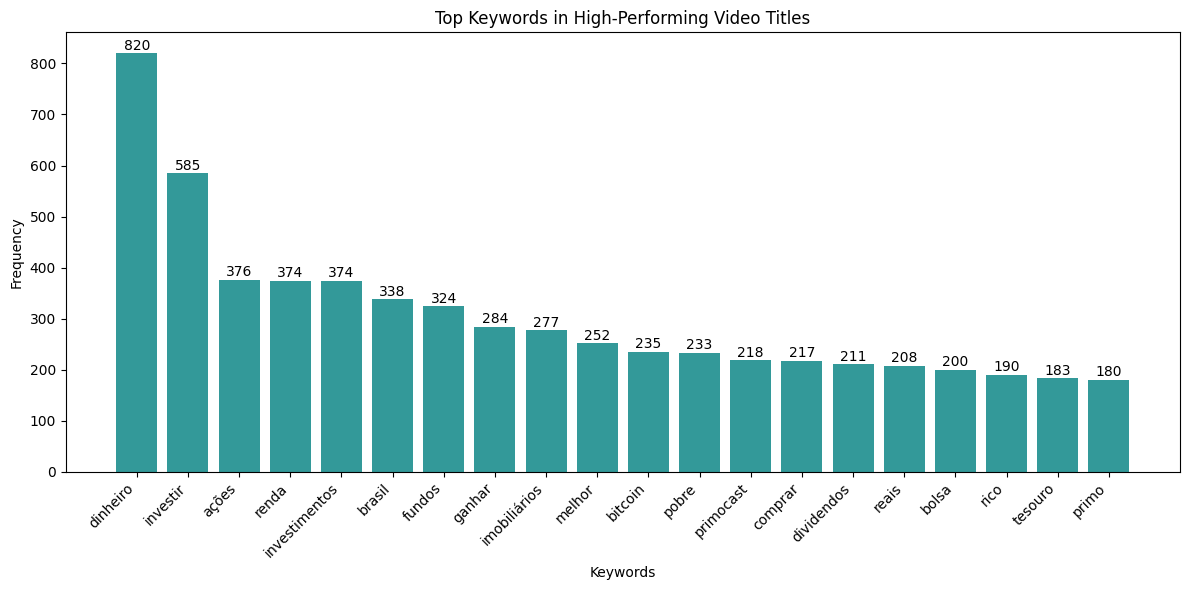

In [73]:
# Define a threshold for high-performing videos
view_threshold = 100000  # Define as needed (e.g., 10K, 100K views)
high_performing_videos = finance_filtered_data[finance_filtered_data["Views"] > view_threshold]

# Extract video titles
video_titles = high_performing_videos["Title"].dropna()

# Use CountVectorizer to extract keywords
vectorizer = CountVectorizer(
    stop_words=[
        "de", "da", "do", "em", "para", "que", "e", "o", "a", "os", "as", "um", "uma", 
        "no", "na", "com", "por", "se", "ao", "dos", "das", "mais", "meu", "minha", 
        "seu", "sua", "seus", "suas", "já", "ou", "como", "ele", "ela", "você", 
        "não", "sim", "pelo", "pela","vai","shorts","está","pra","mil","vale","pena","fazer","10","sobre","qual","eu","minecraft","ban"
    ],  # Portuguese stop words
    max_features=20  # Adjust to show more keywords
)

# Transform titles into a matrix of token counts
title_matrix = vectorizer.fit_transform(video_titles)
keywords = vectorizer.get_feature_names_out()
keyword_counts = title_matrix.sum(axis=0).A1

# Create a DataFrame for visualization
keyword_df = pd.DataFrame({"Keyword": keywords, "Frequency": keyword_counts})
keyword_df = keyword_df.sort_values("Frequency", ascending=False)

# Plot the top keywords
plt.figure(figsize=(12, 6))
plt.bar(keyword_df["Keyword"], keyword_df["Frequency"], color="teal", alpha=0.8)

# Annotate bars with frequency values
for i, freq in enumerate(keyword_df["Frequency"]):
    plt.text(i, freq + 1, str(freq), ha="center", va="bottom", fontsize=10)

plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Top Keywords in High-Performing Video Titles")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

What are the emerging trends in finance-related topics based on recent uploads?

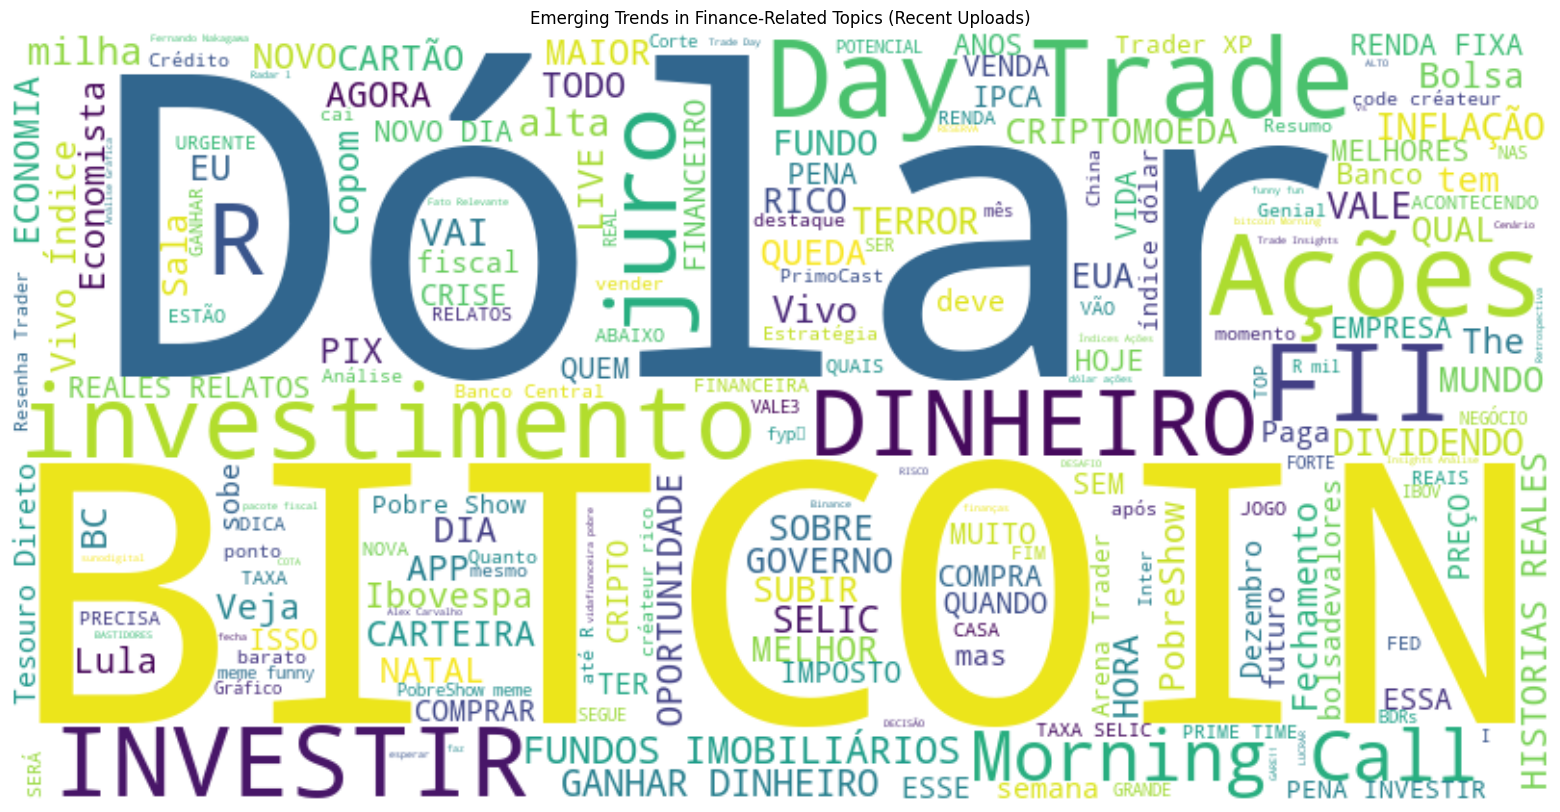

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Filter data to include only recent uploads (e.g., last 30 days)
finance_filtered_data["Date"] = pd.to_datetime(finance_filtered_data["Date"])
recent_videos = finance_filtered_data[finance_filtered_data["Date"] >= pd.Timestamp.now() - pd.Timedelta(days=60)]

# Concatenate all video titles into a single string
recent_titles = " ".join(recent_videos["Title"].dropna().tolist())

# Define stop words in Portuguese to exclude common words
stop_words = set([
    "de", "da", "do", "em", "para", "que", "e", "o", "a", "os", "as", "um", "uma", 
    "no", "na", "com", "por", "se", "ao", "dos", "das", "mais", "meu", "minha", 
    "seu", "sua", "seus", "suas", "já", "ou", "como", "ele", "ela", "você", 
    "não", "sim", "pelo", "pela","SANTIAGO","CHILE","DEZ","ANO","JAPA","É","VALPARAÍSO","Pode","Fazer","CNN","Está","vou","são","ainda",
    "podem","saber","inscreva","meus","te","entenda","nos","mão","pra","agenda","ritual","canal","short","shorts","Mercado","Brasil"
])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=stop_words,
    colormap="viridis"
).generate(recent_titles)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Emerging Trends in Finance-Related Topics (Recent Uploads)")
plt.show()


In [75]:
# Export the dataframe to an Excel file
finance_filtered_data.to_excel('FINAL - finance_filtered_data.xlsx', index=False)